In [ ]:
!pip install qiskit

In [ ]:
!pip install pennylane --upgrade

In [32]:
import numpy as np
import networkx as nx  # tool to handle general Graphs 
import matplotlib.pyplot as plt 
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

from qiskit import Aer, IBMQ
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile, assemble
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram

[(0, 0, 1.0), (0, 1, 1.0), (0, 2, 1.0), (0, 4, 1.0), (0, 7, 1.0), (0, 8, 1.0), (0, 9, 1.0), (0, 11, 1.0), (1, 2, 1.0), (1, 3, 1.0), (1, 6, 1.0), (1, 8, 1.0), (1, 9, 1.0), (2, 2, 1.0), (2, 4, 1.0), (2, 10, 1.0), (2, 11, 1.0), (3, 3, 1.0), (3, 6, 1.0), (3, 7, 1.0), (3, 8, 1.0), (3, 9, 1.0), (4, 6, 1.0), (5, 6, 1.0), (5, 7, 1.0), (5, 10, 1.0), (5, 11, 1.0), (6, 6, 1.0), (6, 11, 1.0), (7, 8, 1.0), (7, 10, 1.0), (8, 9, 1.0), (9, 10, 1.0), (9, 11, 1.0), (10, 10, 1.0), (10, 11, 1.0)]


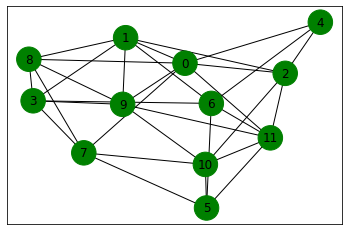

In [ ]:
number_of_vertices = 12
vertices = np.arange(0,number_of_vertices,1)
edges = []
for i in range (0,number_of_vertices):
    for j in range(i,number_of_vertices):
        if np.random.random() < 0.5:
            continue
        else:
            edges.append((i,j,1.0))
#edges =[(0,1,1.0),(0,2,1.0),(1,2,1.0),(3,2,1.0),(3,4,1.0),(4,2,1.0)] 
print(edges)
G = nx.Graph()
G.add_nodes_from(vertices)
G.add_weighted_edges_from(edges)

# Generate plot of the Graph
colors       = ['g' for node in G.nodes()]
default_axes = plt.axes(frameon=True)
pos          = nx.spring_layout(G)

nx.draw_networkx(G, node_color=colors, node_size=600, alpha=1, ax=default_axes, pos=pos)

In [35]:
import pennylane as qml
from pennylane import numpy as np

np.random.seed(42)

In [30]:
n_wires = 3
graph =[(0, 1), (0, 2)]
#graph = [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11)]


# unitary operator U_B with parameter beta
def U_beta(beta):
    for wire in range(n_wires):
        qml.RX(2 * beta, wires=wire)


# unitary operator U_C with parameter gamma
def U_gamma(gamma):
    for edge in graph:
        wire1 = edge[0]
        wire2 = edge[1]
        qml.CNOT(wires=[wire1, wire2])
        qml.RZ(gamma, wires=wire2)
        qml.CNOT(wires=[wire1, wire2])

In [9]:
n_qubits = 3
n_layers = 1

edges =[(0, 1), (0, 2)]

In [25]:
# prepare the quantum and classical resisters
qaoa_circuit = QuantumCircuit(n_qubits, n_qubits)

def U_initial_state():
  for q in range(n_qubits):
    qaoa_circuit.h(q)
    
def U_beta(beta):
    for q in range(n_qubits):
        qaoa_circuit.rx(2 * beta, q)

def U_gamma(gamma):
    for edge in edges:
        q1 = edge[0]
        q2 = edge[1]
        qaoa_circuit.cx(q1, q2)
        qaoa_circuit.rz(gamma,q2)
        qaoa_circuit.cx(q1, q2)

In [26]:
init_params = 0.01 * np.random.rand(2, n_layers)

U_initial_state()
U_B(init_params[0])
U_C(init_params[1])

qaoa_circuit.draw()

/usr/local/lib/python3.7/dist-packages/qiskit/circuit/instruction.py:88: DeprecationWarning: Gate param type <class 'numpy.ndarray'> is being deprecated as of 0.16.0, and will be removed no earlier than 3 months after that release date. Considering creating your own Gate subclass with the method validate_parameter  to allow this param type.
  self.params = params
/usr/local/lib/python3.7/dist-packages/qiskit/circuit/instruction.py:88: DeprecationWarning: Gate param type <class 'numpy.ndarray'> is being deprecated as of 0.16.0, and will be removed no earlier than 3 months after that release date. Considering creating your own Gate subclass with the method validate_parameter  to allow this param type.
  self.params = params
/usr/local/lib/python3.7/dist-packages/qiskit/circuit/instruction.py:88: DeprecationWarning: Gate param type <class 'numpy.ndarray'> is being deprecated as of 0.16.0, and will be removed no earlier than 3 months after that release date. Considering creating your own G

┌───┐┌────┐                                
q_0: ┤ H ├┤ RX ├──■──────────■────■──────────■──
     ├───┤├────┤┌─┴─┐┌────┐┌─┴─┐  │          │  
q_1: ┤ H ├┤ RX ├┤ X ├┤ RZ ├┤ X ├──┼──────────┼──
     ├───┤├────┤└───┘└────┘└───┘┌─┴─┐┌────┐┌─┴─┐
q_2: ┤ H ├┤ RX ├────────────────┤ X ├┤ RZ ├┤ X ├
     └───┘└────┘                └───┘└────┘└───┘
c: 3/═══════════════════════════════════════════

In [ ]:
# apply the layer of Hadamard gates to all qubits
QAOA.h(range(len(V)))
QAOA.barrier()

# apply the Ising type gates with angle gamma along the edges in E
for edge in E:
    k = edge[0]
    l = edge[1]
    QAOA.cp(-2*gamma, k, l)
    QAOA.p(gamma, k)
    QAOA.p(gamma, l)
    
# then apply the single qubit X rotations with angle beta to all qubits
QAOA.barrier()
QAOA.rx(2*beta, range(len(V)))

# Finally measure the result in the computational basis
QAOA.barrier()
QAOA.measure(range(len(V)),range(len(V)))

### draw the circuit for comparison
QAOA.draw()

In [37]:
def comp_basis_measurement(wires):
    n_wires = len(wires)
    return qml.Hermitian(np.diag(range(2 ** n_wires)), wires=wires)

In [36]:
dev = qml.device("default.qubit", wires=n_wires, shots=1)

In [38]:
pauli_z = [[1, 0], [0, -1]]
pauli_z_2 = np.kron(pauli_z, pauli_z, requires_grad=False)


@qml.qnode(dev)
def circuit(gammas, betas, edge=None, n_layers=1):
    # apply Hadamards to get the n qubit |+> state
    for wire in range(n_wires):
        qml.Hadamard(wires=wire)
    # p instances of unitary operators
    for i in range(n_layers):
        U_C(gammas[i])
        U_B(betas[i])
    if edge is None:
        # measurement phase
        return qml.sample(comp_basis_measurement(range(n_wires)))
    # during the optimization phase we are evaluating a term
    # in the objective using expval
    return qml.expval(qml.Hermitian(pauli_z_2, wires=edge))

In [13]:
def qaoa_maxcut(n_layers=1):
    print("\np={:d}".format(n_layers))

    # initialize the parameters near zero
    init_params = 0.01 * np.random.rand(2, n_layers)

    # minimize the negative of the objective function
    def objective(params):
        gammas = params[0]
        betas = params[1]
        neg_obj = 0
        for edge in graph:
            # objective for the MaxCut problem
            neg_obj -= 0.5 * (1 - circuit(gammas, betas, edge=edge, n_layers=n_layers))
        return neg_obj

    # initialize optimizer: Adagrad works well empirically
    opt = qml.AdagradOptimizer(stepsize=0.5)

    # optimize parameters in objective
    params = init_params
    steps = 30
    for i in range(steps):
        params = opt.step(objective, params)
        if (i + 1) % 5 == 0:
            print("Objective after step {:5d}: {: .7f}".format(i + 1, -objective(params)))

    # sample measured bitstrings 100 times
    bit_strings = []
    n_samples = 60
    for i in range(0, n_samples):
        print(i)
        bit_strings.append(int(circuit(params[0], params[1], edge=None, n_layers=n_layers)))

    # print optimal parameters and most frequently sampled bitstring
    counts = np.bincount(np.array(bit_strings))
    most_freq_bit_string = np.argmax(counts)
    print("Optimized (gamma, beta) vectors:\n{}".format(params[:, :n_layers]))
    print("Most frequently sampled bit string is: {:04b}".format(most_freq_bit_string))

    return -objective(params), bit_strings


# perform qaoa on our graph with p=1,2 and
# keep the bitstring sample lists
bitstrings1 = qaoa_maxcut(n_layers=1)[1]
bitstrings2 = qaoa_maxcut(n_layers=2)[1]


p=1
Objective after step     5:  10.0000000
Objective after step    10:  6.0000000
Objective after step    15:  5.0000000
Objective after step    20:  7.0000000
Objective after step    25:  6.0000000
Objective after step    30:  9.0000000
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
Optimized (gamma, beta) vectors:
[[ 0.86123269]
 [-0.27145806]]
Most frequently sampled bit string is: 100000000000

p=2
Objective after step     5:  5.0000000
Objective after step    10:  5.0000000
Objective after step    15:  11.0000000
Objective after step    20:  9.0000000
Objective after step    25:  7.0000000
Objective after step    30:  7.0000000
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
Optimized (gamma, beta) vectors:
[[ 0.25046567  0.49380718]
 [-1

In [40]:
n_wires = 2
graph =[(0, 1)]
c = circuit([ 0.25046567,  0.49380718],[-1.83390153, -0.32260834], edge=None, n_layers=1)
circuit.draw()

/usr/local/lib/python3.7/dist-packages/qiskit/circuit/instruction.py:88: DeprecationWarning: Gate param type <class 'pennylane.numpy.tensor.tensor'> is being deprecated as of 0.16.0, and will be removed no earlier than 3 months after that release date. Considering creating your own Gate subclass with the method validate_parameter  to allow this param type.
  self.params = params
/usr/local/lib/python3.7/dist-packages/qiskit/circuit/instruction.py:88: DeprecationWarning: Gate param type <class 'pennylane.numpy.tensor.tensor'> is being deprecated as of 0.16.0, and will be removed no earlier than 3 months after that release date. Considering creating your own Gate subclass with the method validate_parameter  to allow this param type.
  self.params = params
/usr/local/lib/python3.7/dist-packages/qiskit/circuit/instruction.py:88: DeprecationWarning: Gate param type <class 'pennylane.numpy.tensor.tensor'> is being deprecated as of 0.16.0, and will be removed no earlier than 3 months after th

WireError: ignored

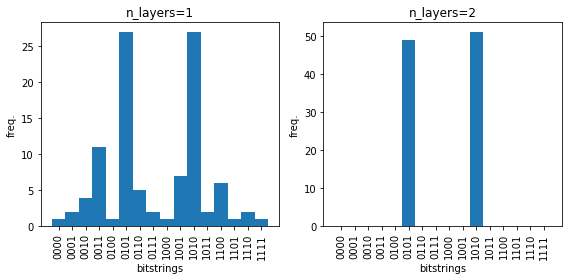

In [ ]:
import matplotlib.pyplot as plt

xticks = range(0, 16)
xtick_labels = list(map(lambda x: format(x, "04b"), xticks))
bins = np.arange(0, 17) - 0.5

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title("n_layers=1")
plt.xlabel("bitstrings")
plt.ylabel("freq.")
plt.xticks(xticks, xtick_labels, rotation="vertical")
plt.hist(bitstrings1, bins=bins)
plt.subplot(1, 2, 2)
plt.title("n_layers=2")
plt.xlabel("bitstrings")
plt.ylabel("freq.")
plt.xticks(xticks, xtick_labels, rotation="vertical")
plt.hist(bitstrings2, bins=bins)
plt.tight_layout()
plt.show()